<a href="https://colab.research.google.com/github/febse/econ2025-de/blob/main/10-Interaction-Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interaktionseffekte

Open in Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/econ2025-de/blob/main/10-Interaction-Effects.ipynb)


In [3]:
library(tidyverse)

# Load the data
stu <- read.csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv") %>%
  mutate(
    sex = ifelse(male == 1, "M", "F")
  ) %>%
  filter(!is.na(gpa))

# Print the first few rows
stu %>% head()

,male,drink,gpa,malegpa,sex
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,5,3.20,3.20,M
2,0,9,3.00,0.00,F
3,1,29,2.85,2.85,M
4,1,6,3.00,3.00,M
5,0,17,2.41,0.00,F
6,0,12,3.50,0.00,F


Schätzen Sie die folgenden Modelle und interpretieren Sie die Koeffizienten.

- $\text{gpa}_i = \beta_0 + \beta_1 \text{drink}_i + e_i$
- $\text{gpa}_i = \beta_0 + \beta_1 \text{sexMale}_i + e_i$
- $\text{gpa}_i =\beta_0 + \beta_1 \text{drink}_i + \beta_2 \text{sexMale}_i + e_i$
- $\text{gpa}_i = \beta_0 + \beta_1 \text{drink}_i + \beta_2 \text{sexMale}_i +
\beta_3 \text{gpa}_i \cdot \text{sexMale}_i$

In [4]:
fit1 <- lm(gpa ~ drink, data = stu)
summary(fit1)



Call:
lm(formula = gpa ~ drink, data = stu)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33574 -0.31269  0.00093  0.29783  1.13740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.170037   0.088900   35.66  < 2e-16 ***
drink       -0.019215   0.004448   -4.32 2.38e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4416 on 216 degrees of freedom
Multiple R-squared:  0.07952,	Adjusted R-squared:  0.07526 
F-statistic: 18.66 on 1 and 216 DF,  p-value: 2.382e-05


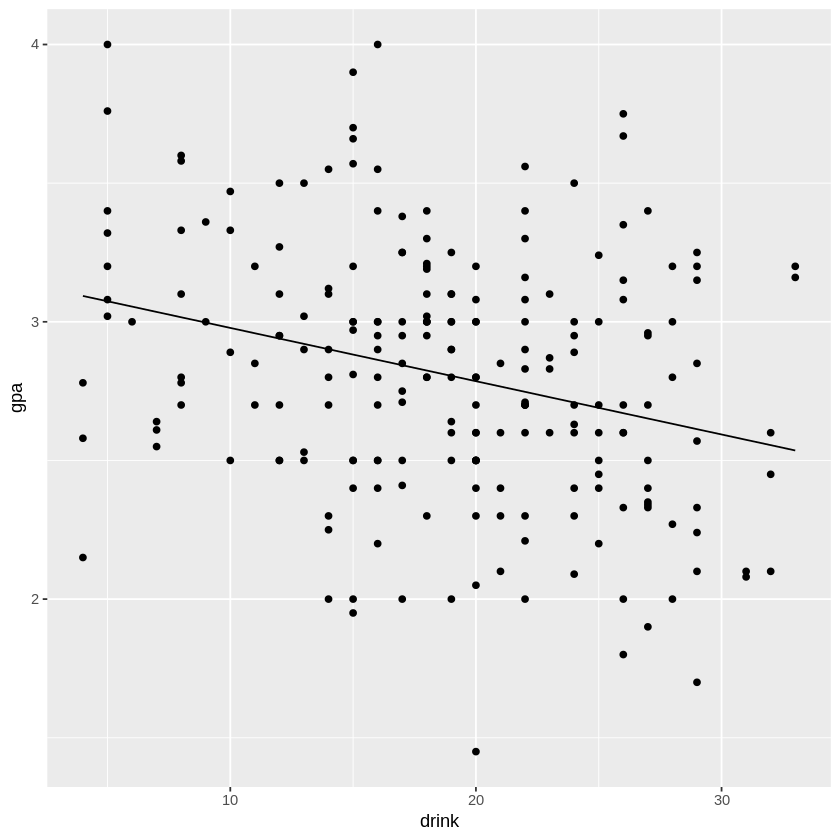

In [5]:
# Visualize the model

stu %>%
  mutate(
    predicted1 = predict(fit1)
  ) %>%
  ggplot(aes(x = drink, y = gpa)) +
  geom_point() +
    geom_line(aes(y = predicted1))


In [6]:
fit2 <- lm(gpa ~ sex, data = stu)
summary(fit2)



Call:
lm(formula = gpa ~ sex, data = stu)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43294 -0.31483 -0.01879  0.28121  1.11706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.88294    0.04151  69.447  < 2e-16 ***
sexM        -0.16415    0.06160  -2.665  0.00829 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4528 on 216 degrees of freedom
Multiple R-squared:  0.03183,	Adjusted R-squared:  0.02735 
F-statistic: 7.101 on 1 and 216 DF,  p-value: 0.008286


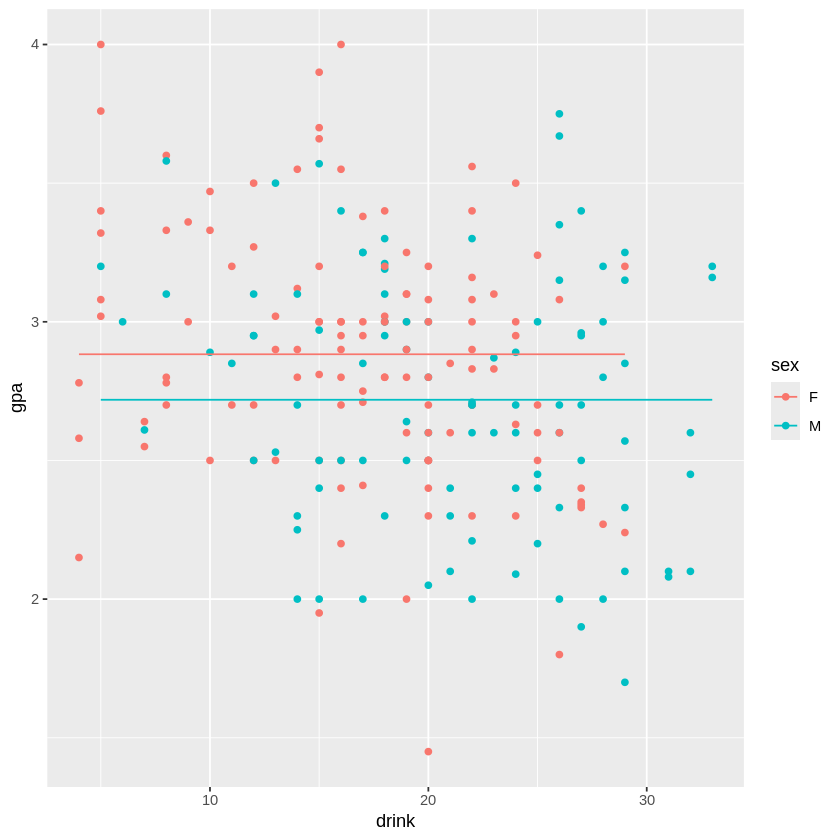

In [7]:
stu %>%
  mutate(
    predicted2 = predict(fit2)
  ) %>%
  ggplot(aes(x = drink, y = gpa, color = sex)) +
  geom_point() +
    geom_line(aes(y = predicted2))

In [9]:
fit3 <- lm(gpa ~ sex + drink, data = stu)
summary(fit3)


Call:
lm(formula = gpa ~ sex + drink, data = stu)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.38092 -0.32400 -0.00272  0.28350  1.11567 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.172920   0.088668  35.784  < 2e-16 ***
sexM        -0.093999   0.062866  -1.495 0.136318    
drink       -0.017100   0.004656  -3.673 0.000303 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4403 on 215 degrees of freedom
Multiple R-squared:  0.08899,	Adjusted R-squared:  0.08052 
F-statistic:  10.5 on 2 and 215 DF,  p-value: 4.452e-05


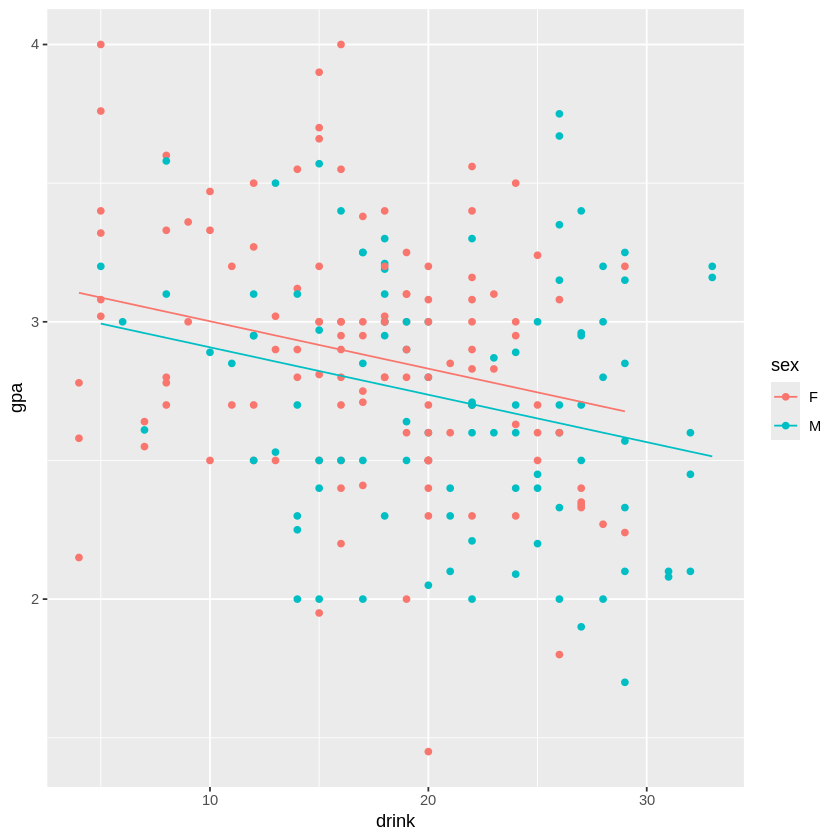

In [10]:
stu %>%
  mutate(
    predicted3 = predict(fit3)
  ) %>%
  ggplot(aes(x = drink, y = gpa, color = sex)) +
  geom_point() +
    geom_line(aes(y = predicted3))

In [12]:
fit4 <- lm(gpa ~ sex * drink, data = stu)
summary(fit4)


Call:
lm(formula = gpa ~ sex * drink, data = stu)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36933 -0.31638 -0.00175  0.27481  1.09703 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.237566   0.117529  27.547  < 2e-16 ***
sexM        -0.243004   0.188456  -1.289  0.19863    
drink       -0.020912   0.006508  -3.213  0.00152 ** 
sexM:drink   0.007818   0.009320   0.839  0.40253    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4406 on 214 degrees of freedom
Multiple R-squared:  0.09198,	Adjusted R-squared:  0.07925 
F-statistic: 7.226 on 3 and 214 DF,  p-value: 0.0001217


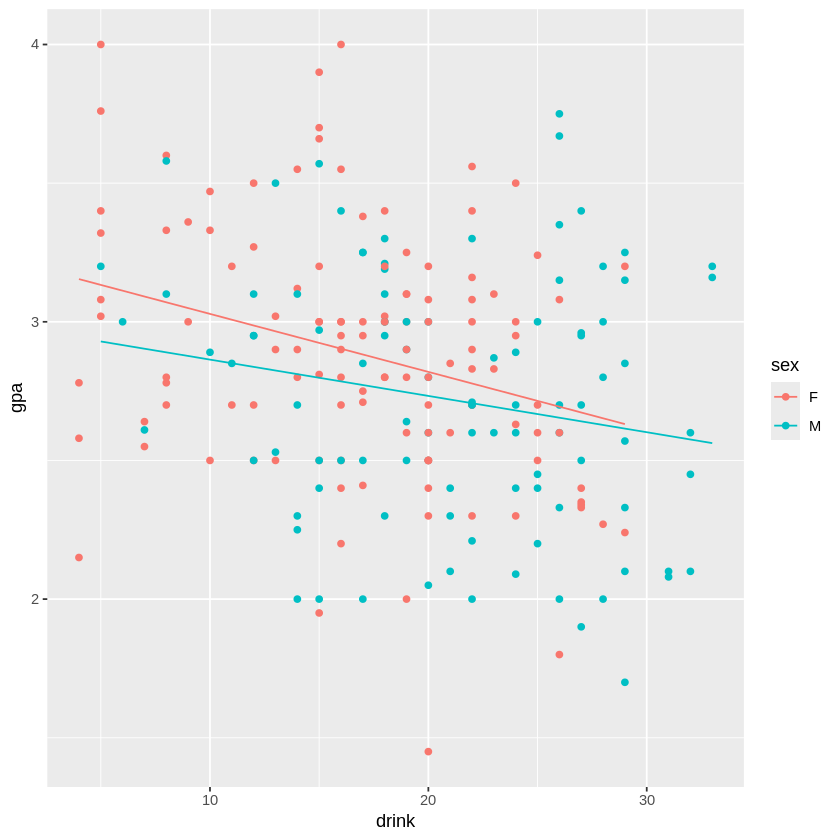

In [13]:
stu %>%
  mutate(
    predicted4 = predict(fit4)
  ) %>%
  ggplot(aes(x = drink, y = gpa, color = sex)) +
  geom_point() +
    geom_line(aes(y = predicted4))